In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


# i want to predict how much "EPS - Earnings Per Share" google will make based off of thier EBIT, Revenue, cash on hand, total current assets
# x AKA questions should contain EBIT, Revenue, cash on hand, total current assets
# y AKA answer should contain EPI- Earnings Per Share
dataset = pd.read_csv('google_final.csv')

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
# We're going to remove the dates from the dataset so that we can use them as an index (marks each row according to the date it occured)
dates = dataset.pop("Date")


In [ ]:
# 1 dataset should have all the features/variables/questions AKA inputs that the machine uses
x = dataset[["PE","CPI","UR","FED_IR","PPI","IPI","REAL_GDP"]]
x.head

<bound method NDFrame.head of              PE  CPI   UR  FED_IR  PPI     IPI  REAL_GDP
0     75.634042  0.3  8.3    0.08 -0.1  0.6136       0.3
1     75.960261  0.3  8.3    0.08 -0.1  0.6136       0.3
2     74.906584  0.3  8.3    0.08 -0.1  0.6136       0.3
3     73.884732  0.3  8.3    0.08 -0.1  0.6136       0.3
4     70.752116  0.3  8.3    0.08 -0.1  0.6136       0.3
...         ...  ...  ...     ...  ...     ...       ...
2680  82.189944  0.1  3.7    2.33 -0.3 -0.0695       1.5
2681  81.504655  0.1  3.7    2.33 -0.3 -0.0695       1.5
2682  81.147114  0.1  3.7    2.33 -0.3 -0.0695       1.5
2683  80.610801  0.1  3.7    2.33 -0.3 -0.0695       1.5
2684  81.743017  0.4  3.5    2.56  0.0  0.3784      -0.6

[2685 rows x 7 columns]>

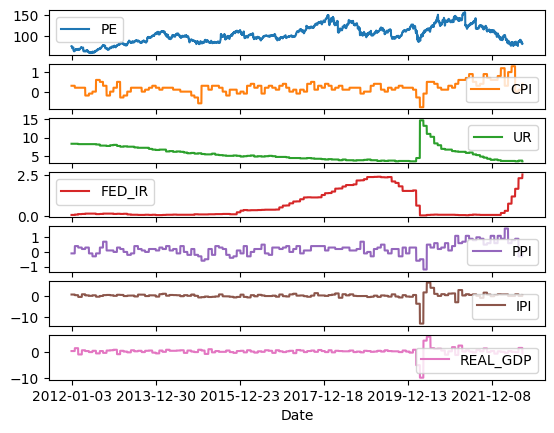

In [ ]:
# Plotting the feature's based off of date
x.index = dates
_ = x.plot(subplots=True)

In [ ]:
# The other dataset should have all of the labels/results (answer key) AKA output values that you want the machine to predict
y = dataset["Close"]
y.head

<bound method NDFrame.head of 0        16.686760
1        16.758733
2        16.526265
3        16.300819
4        15.609686
           ...    
2680    110.340000
2681    109.420000
2682    108.940000
2683    108.220000
2684    109.740000
Name: Close, Length: 2685, dtype: float64>

In [ ]:
from sklearn.model_selection import train_test_split
#Using SciKit learn to split a portion (0.2) to use as a testing set later.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Length of the training input set:", len(x_train))
print("Length of the training output set:", len(y_train))

print("Length of the test input set:", len(x_test))
print("Length of the test output set:", len(y_test))



Length of the training input set: 2148
Length of the training output set: 2148
Length of the test input set: 537
Length of the test output set: 537


Split the data into a training set and a testing set.

In [ ]:
# It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

# The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

# Normalize the training features
train_mean = x_train.mean()
train_std = x_train.std()

normalized_x_train = (x_train - train_mean) / train_std
normalized_x_train.head

# Normalize the validation features which we aren't using in this example. I think it's used usually when you have a lot of data to work with but can be forgoed if you don't
# val_df = (val_df - train_mean) / train_std


<bound method NDFrame.head of                   PE       CPI        UR    FED_IR       PPI       IPI  \
Date                                                                     
2015-11-17  0.206910 -0.351294 -0.259755 -0.671852 -1.327166 -0.545387   
2013-03-12 -0.970961 -1.716431  0.993369 -0.645792 -0.035479  0.232738   
2018-08-24  1.475326 -0.010010 -0.938530  1.660541 -0.293817  0.413221   
2017-07-25  1.042877 -0.692578 -0.677463  0.670251 -0.293817 -0.155768   
2015-05-05 -0.944427  0.331274  0.001313 -0.671852 -1.068829 -0.349792   
...              ...       ...       ...       ...       ...       ...   
2016-09-16 -0.158526  0.331274 -0.311968 -0.307009 -1.068829 -0.110173   
2015-06-19 -0.834542  0.331274 -0.155328 -0.658822  0.481195 -0.238193   
2021-02-02  2.209056  0.672559  0.314594 -0.723973  2.289557 -2.047210   
2016-06-15 -0.352053  0.331274 -0.364182 -0.333069 -0.035479  0.268128   
2012-08-17 -1.681646  1.355127  1.306650 -0.658822 -0.810491 -0.317673   

       

In [ ]:
# Normalize the test features
normalized_x_test = (x_test - train_mean) / train_std
normalized_x_test.head

<bound method NDFrame.head of                   PE       CPI        UR    FED_IR       PPI       IPI  \
Date                                                                     
2016-11-04 -0.506450 -0.351294 -0.468609 -0.293979  0.222858 -0.316103   
2016-02-12 -0.371856 -1.033862 -0.364182 -0.333069  0.481195 -0.381192   
2013-12-04 -0.157780  0.331274  0.575661 -0.710943 -0.035479  0.094056   
2015-01-09 -1.085750 -2.740284  0.053526 -0.684883 -1.327166 -0.544340   
2020-04-09 -0.246867 -3.422852  4.752742 -0.763063 -1.843841 -8.675301   
...              ...       ...       ...       ...       ...       ...   
2015-08-18 -0.016077 -0.692578 -0.259755 -0.645792 -0.035479 -0.191616   
2012-12-17 -1.398331 -0.692578  1.202223 -0.619732 -0.293817  0.122185   
2021-08-30  1.095139  0.331274 -0.207541 -0.710943  2.031220 -0.065887   
2013-05-02 -1.110112 -0.692578  0.993369 -0.684883 -1.068829  0.015491   
2019-11-14  0.452467 -0.010010 -1.042957  1.191456  0.222858  0.163004   

       

In [ ]:
# Reshape x_train to be (n_samples, time_steps, features); This is because LTSM requires the input shape to follow that format
print(normalized_x_train.shape)
normalized_x_train = x_train.values.reshape((normalized_x_train.shape[0], 1, normalized_x_train.shape[1]))
normalized_x_test = x_test.values.reshape((normalized_x_test.shape[0], 1, normalized_x_test.shape[1]))
print(normalized_x_train.shape, y_train.shape, normalized_x_test.shape, y_test.shape)

(2148, 7)
(2148, 1, 7) (2148,) (537, 1, 7) (537,)


Build and train the model.

In [ ]:
import tensorflow as tf
#Using Tensorflow's keras libraries for sequential machine learning 
lstm_model =  tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=(normalized_x_train.shape[1], normalized_x_train.shape[2])))
lstm_model.add(tf.keras.layers.Dense(units=1))

In [ ]:
#We will be using Sigmoid as a base testing activation method, this is the general standard
#model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#We will be using adam as our optimizer, this is also the general standard
#We are teaching the AI to seek accuracy
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
# Assume that you have trained your LSTM model and called it 'my_model'
# Define the path to save the model
model_path = 'google.h5'

#Our data set is fairly small for Michael's fit, 500 epochs will be okay
lstm_model.fit(normalized_x_train, y_train, epochs=500)

# Save the trained model to the notebook
lstm_model.save(model_path)


Epoch 1/500
68/68 [==============================] - 2s 2ms/step - loss: 3920.7803 - mean_absolute_error: 52.1799
Epoch 2/500
68/68 [==============================] - 0s 2ms/step - loss: 3427.5703 - mean_absolute_error: 47.1963
Epoch 3/500
68/68 [==============================] - 0s 2ms/step - loss: 3102.1011 - mean_absolute_error: 43.6519
Epoch 4/500
68/68 [==============================] - 0s 2ms/step - loss: 2862.1985 - mean_absolute_error: 40.8236
Epoch 5/500
68/68 [==============================] - 0s 2ms/step - loss: 2658.6956 - mean_absolute_error: 38.2711
Epoch 6/500
68/68 [==============================] - 0s 2ms/step - loss: 2484.6035 - mean_absolute_error: 36.1671
Epoch 7/500
68/68 [==============================] - 0s 2ms/step - loss: 2326.2520 - mean_absolute_error: 34.3507
Epoch 8/500
68/68 [==============================] - 0s 2ms/step - loss: 2181.1235 - mean_absolute_error: 32.6896
Epoch 9/500
68/68 [==============================] - 0s 2ms/step - loss: 2062.4712 - mea

In [ ]:
# Import the required libraries
import tensorflow as tf
import numpy as np

# Load the saved TensorFlow model
model = tf.keras.models.load_model('google.h5')

# Provide a new PE number and the latest available values for the other features
new_pe = 84.69  # Replace this with the new PE number

# Replace the example values below with the latest available values for the corresponding features
latest_cpi = 0.4
latest_ur = 3.5
latest_fed_ir = 2.56
latest_ppi = 0
latest_ipi = 0.3784
latest_real_gdp = -0.6

# Create an input array containing the new PE number and the latest available values for the other features
input_features = np.array([[new_pe, latest_cpi, latest_ur, latest_fed_ir, latest_ppi, latest_ipi, latest_real_gdp]])

# Reshape the input_features array to match the expected input shape
input_features = input_features.reshape((1, 1, 7))

# Make a prediction for the next "Close" value
prediction = model.predict(input_features)

# Print the predicted "Close" value
print("Predicted 'Close' value:", prediction[0][0])


1/1 [==============================] - 0s 327ms/step
Predicted 'Close' value: 71.008026


In [ ]:
# Import the required libraries
import tensorflow as tf
import numpy as np

# Load the saved TensorFlow model
model = tf.keras.models.load_model('google.h5')

# Provide a new PE number and placeholders for other features
new_pe = 84.69  # Replace this with the new PE number
input_features = np.array([[new_pe, 0, 0, 0, 0, 0, 0]])  # Replace zeros with actual feature values if available

# Reshape the input_features array to match the expected input shape
input_features = input_features.reshape((1, 1, 7))

# Make a prediction for the next "Close" value
prediction = model.predict(input_features)

# Print the predicted "Close" value
print("Predicted 'Close' value:", prediction[0][0])


1/1 [==============================] - 0s 315ms/step
Predicted 'Close' value: 108.96927
